### Final Test: (15 points)

### Predicting the number of likes on Instagram using Regression Techniques

One billion people use Instagram every month, which makes it one of the most popular social networks worldwide.
Currently, there is an enormous scope market with the potential to be optimized to increase Instagram posts popularity and engagement.

Ref: https://upcommons.upc.edu/bitstream/handle/2117/339937/152579.pdf?sequence=1&isAllowed=y


---
### The Instagram Users Datetime Posts Dataset   
We explore the Instagram Users Datetime Posts dataset, which contains info of 1089 users' posts.

The dataset can estimate the number of likes/likes scores given a post based on different features such as the time and date of the post, type of the post, number of tags, numbers of comments, or how many days the post has been posted.

--
### Objective:
#### Estimate the number of likes based on number of tags, numbers of comments, or days passed from post.
---


### Dataset:
you can find the dataset on Canvas under Dataset section: Instagram_Data

### Steps to do:

    1- import libraries and initialize the plotting environment using matplotlib and/or seaborn  (1 point)

In [8]:
# write you code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

    2- Loading data into Panda datafram, name it insta_df (1 point)
        * load only the first 2000 rows using the "nrows" parameter

#### Note: you should read just the 2000 examples of the data.

Otherwise, your execution time for each command will be long since the data has 178922 samples.

    3- reset index (1 point)

In [10]:
# write you code here
insta_df = pd.read_csv("Instagram_Data.csv", nrows=2000)
#Resetting index
insta_df.reset_index(drop=True, inplace=True)
##
insta_df

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,17,58,186,0.04,Image,0,84,2020-08-25 18:09:56,2020,8,25,18,9
1996,17,81,193,0.06,Video,4,5,2020-08-18 02:39:23,2020,8,18,2,39
1997,17,251,194,0.19,Image,4,13,2020-08-17 01:17:17,2020,8,17,1,17
1998,17,962,197,0.72,Images,0,38,2020-08-14 18:48:13,2020,8,14,18,48


    4- Show the 10 first rows of the data, its shape, and the coulmens names: (3 points)

In [12]:
# 10 first rows of the data
insta_df.head(10)

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51
5,1,539,677,0.79,Images,3,3,2019-04-22 20:03:00,2019,4,22,20,3
6,1,330,677,0.49,Image,0,3,2019-04-22 15:07:34,2019,4,22,15,7
7,1,472,681,0.69,Images,3,7,2019-04-18 14:44:36,2019,4,18,14,44
8,1,272,682,0.40,Image,0,0,2019-04-17 15:42:56,2019,4,17,15,42
9,1,304,688,0.45,Images,3,0,2019-04-11 15:00:05,2019,4,11,15,0


In [13]:
# insta_df shape
insta_df.shape

(2000, 13)

In [14]:
# insta_df column names
insta_df.columns

Index(['User uuid', 'Likes', 'Days passed from post', 'Likes Score', 'Type',
       'Numer of Tags', 'Numer of Comments', 'Date Posted', 'Year', 'Month',
       'Day', 'Hour', 'Minute'],
      dtype='object')

    5- Check the number of samples in the dataset (1 point)

In [16]:
# insta_df row numbers:
len(insta_df)

2000

    6- Check the data type of each column ( 1 point)

In [18]:
# Print datatypes
insta_df.dtypes

User uuid                  int64
Likes                      int64
Days passed from post      int64
Likes Score              float64
Type                      object
Numer of Tags              int64
Numer of Comments          int64
Date Posted               object
Year                       int64
Month                      int64
Day                        int64
Hour                       int64
Minute                     int64
dtype: object

    7- Remove columns from the dataframe:

        a. Remove user id from the insta_df as there is no useful information from this column. (1 point)

        b. Remove the Likes Score since it is calculated from the number of likes. (1 point)

        c. Remove the date and time columns from the data frame since our goal is not to consider the posted date and time related to the number of likes (2 points)

In [20]:
# Remove User uuid
insta_df.drop('User uuid', axis=1, inplace=True)
# Remove User Likes Score
insta_df.drop('Likes Score', axis=1, inplace=True)

# Remove all columns between column index 1 to 3
insta_df.drop(insta_df.columns[-1:-7:-1], axis=1, inplace=True)
# show the insta_df after you remove the required columns
insta_df

,Likes,Days passed from post,Type,Numer of Tags,Numer of Comments
0,506,657,Image,3,11
1,385,657,Image,0,1
2,373,666,Images,4,15
3,312,667,Images,4,1
4,513,674,Images,5,0
...,...,...,...,...,...
1995,58,186,Image,0,84
1996,81,193,Video,4,5
1997,251,194,Image,4,13
1998,962,197,Images,0,38


    8- Check how many unique values are on the "Type" column. ( 1 point)
        * you can use the unique() function if you wish

In [22]:
# write you code here
uni_val = insta_df['Type'].unique()
len(uni_val)

3

    9- Buid a label encoder or (function + apply method in pandas) to change the "Type" coulmn values to numeric values (4 point)
    a- IMAGE = 1, IMAGES = 2 and Vide0 = 3

In [24]:
# Encode "Type"
label_en = LabelEncoder()
insta_df['Type'] = label_en.fit_transform(insta_df['Type'])

##
insta_df

,Likes,Days passed from post,Type,Numer of Tags,Numer of Comments
0,506,657,0,3,11
1,385,657,0,0,1
2,373,666,1,4,15
3,312,667,1,4,1
4,513,674,1,5,0
...,...,...,...,...,...
1995,58,186,0,0,84
1996,81,193,2,4,5
1997,251,194,0,4,13
1998,962,197,1,0,38


    10- Check how many NaN values are in each column:

        a. How many NaNs as total ( 1 point)

        b. How many NaNs as a percentage of overall data ( 1 point)

In [26]:
# a. How many NaNs as total
print(insta_df.isna().sum())
print('\nTotal NaNs:',insta_df.isna().sum().sum())

Likes                    0
Days passed from post    0
Type                     0
Numer of Tags            0
Numer of Comments        0
dtype: int64

Total NaNs: 0


In [27]:
# b. How many NaNs as a percentage of overall data
print('NaNs as a percentage of overall data is', (insta_df.isna().sum().sum())*100/(insta_df.size),'%')

NaNs as a percentage of overall data is 0.0 %


    11- Divide the data into features (X), and target (y) --> your target is Likes  (2 points)

In [29]:
# your featuers X:
X = insta_df.drop('Likes', axis=1)
##
X

,Days passed from post,Type,Numer of Tags,Numer of Comments
0,657,0,3,11
1,657,0,0,1
2,666,1,4,15
3,667,1,4,1
4,674,1,5,0
...,...,...,...,...
1995,186,0,0,84
1996,193,2,4,5
1997,194,0,4,13
1998,197,1,0,38


In [30]:
# your target y:

y = insta_df['Likes']

##
y

0       506
1       385
2       373
3       312
4       513
       ... 
1995     58
1996     81
1997    251
1998    962
1999    179
Name: Likes, Length: 2000, dtype: int64

    12- Checking for Multicollinearity for features (X) using a correlation matrix. (1 points)

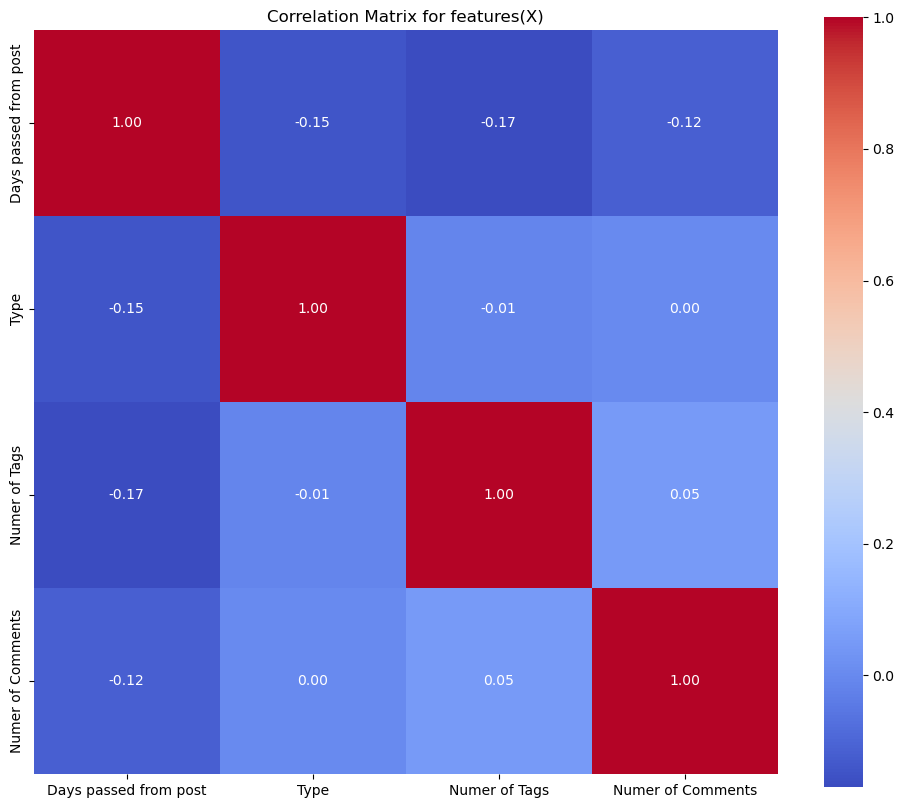

In [32]:
# write your code here:
# to handle the date column dropping it to ensure that all columns are in numbers
multi_coli = X.corr()
plt.figure(figsize=(12,10))
sns.heatmap(multi_coli, annot=True, cmap='coolwarm', fmt='.2f',square=True)
plt.title('Correlation Matrix for features(X)')
plt.show()

    13- From the above pairplot, what did you observe? ( 1 points)

##### Write your answer here:

-- There is no correlation between the features apart from itself.

-- Days passed from post has a negative correlation with all other features

-- Number of comments and Type has zero correlation suggesting that they dont depend at all on each other.

    14- Use a scatter plot to check each feature's relationship with the target variable, Likes. (1 points)

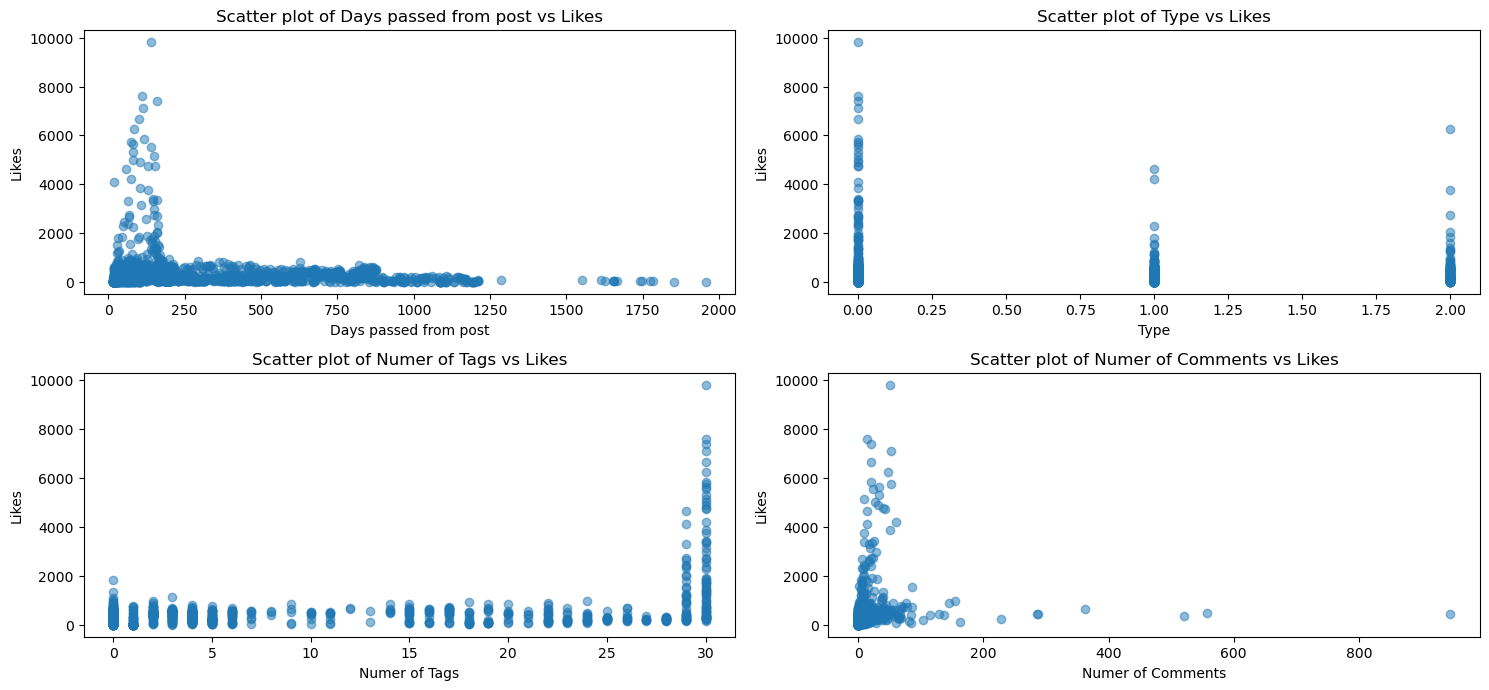

In [35]:
# write your code here
plt.figure(figsize=(15,10))
for i,col in enumerate(X.columns):
    plt.subplot(3,2,i+1)
    plt.scatter(X[col], y, alpha=0.5)
    plt.title(f'Scatter plot of {col} vs Likes')
    plt.xlabel(col)
    plt.ylabel('Likes')
plt.tight_layout()
plt.show()

    15- From the above pairplot, what did you observe? ( 1 points)


##### Write your answer here:

-- Posts vs. Likes: Analyzing the relationship between the number of likes and the days since an Instagram post was made reveals that posts typically receive the highest number of likes within the first 250 days. During this initial period, some posts achieve significant popularity. However, as time progresses, interest in these posts tends to diminish, and after approximately 1,250 days, the chances of gaining additional likes drop considerably.

-- Type vs. Likes: Single-image posts usually generate considerable engagement, with some attracting a large number of likes. Conversely, grouped posts tend to receive less attention, as the individual images within the group do not garner as much interaction. Interestingly, video posts often perform exceptionally well in terms of likes, frequently exceeding the engagement levels of grouped images. Their dynamic nature captures more viewer interest, resulting in a higher rate of likes.

-- Tags vs. Likes: There is generally a positive correlation between the number of tags in a post and the likes it receives. Utilizing more tags can enhance a post's reach and visibility. This strategy is commonly employed, as an increased number of tags improves discoverability, leading to higher engagement and ultimately more likes, which contributes to the post's overall popularity.

-- Likes vs. Number of Comments: Likes and comments usually exhibit a positive correlation, as both metrics are influenced by the post's reach. Interestingly, some posts may garner more comments yet receive fewer likes, suggesting that a high comment count does not always equate to increased likes.

    16- Display the target distribution using histogram (1 points)

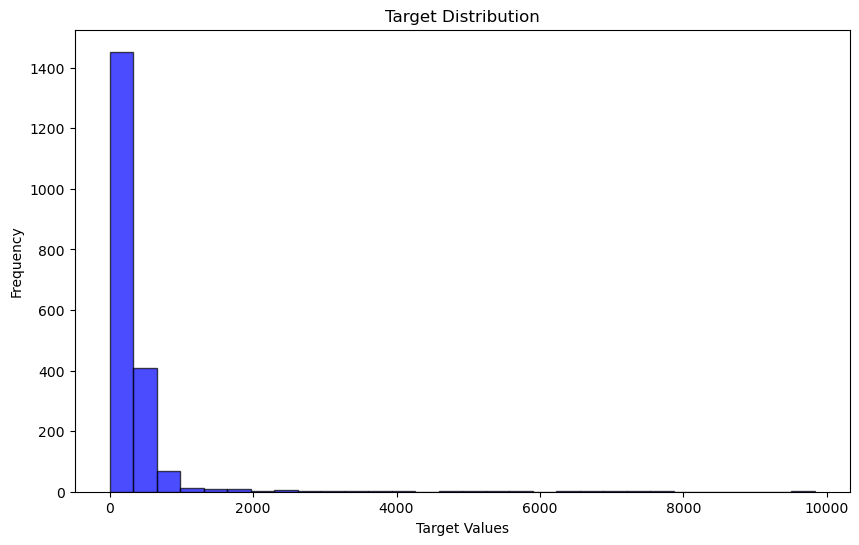

0       506
1       385
2       373
3       312
4       513
       ... 
1995     58
1996     81
1997    251
1998    962
1999    179
Name: Likes, Length: 2000, dtype: int64


In [38]:
# write your code here:
plt.figure(figsize=(10, 6))
plt.hist(insta_df['Likes'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Target Distribution')
plt.xlabel('Target Values')
plt.ylabel('Frequency')
#plt.grid(axis='y', alpha=0.75)
plt.show()
print(y)

    17- From the above histogram, what did you observe about the target distribution? ( 1 point)
    

##### Write your answer here:

--This histogram summarizes the distribution of likes across Instagram posts in the dataset, illustrating the general trend in post popularity. It indicates that most posts receive a low to moderate number of likes. The distribution is right-skewed, indicating that the majority of posts have relatively few likes. Out of 2,000 posts, 1,800 received fewer than 1,500 likes, while only a small fraction surpassed 2,000 likes.

    18-Transfer the target y into log to have the normal distributions: (1 point)

In [41]:
#transfer the target y into log
y = np.log(y)

### Preparing the machine learning pipeline


    19- Splitting the data into training 80% and testing sets 20%. (1 point)
        * print the sizes of our training and test set to verify if the splitting has occurred properly. (1 point)

In [44]:
from sklearn.model_selection import train_test_split
# Splitting the data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print the sizes of our training and test set:
print(f"Training set size (X_train): {len(X_train)}")
print(f"Test set size (X_test): {len(X_test)}")

Training set size (X_train): 1600
Test set size (X_test): 400


    20- Use Pipeline class with the cross-validation to fit the scaling on only the training dataset and evaluate the linear regression model, (Use k=10 and MSE as your metric)( 2 point)

        * 'neg_mean_squared_error' returns the negated value of the MSE; make sure to take the absolute to get the positive one (1 point)
        * print the average MSE (1 point)

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# writer your code here:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale the data
    ('regressor', LinearRegression())  # Linear regression model
])
mse_scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
mse_scores = -mse_scores
average_mse = np.mean(mse_scores)
print(f'Average MSE from cross-validation: {average_mse}')

Average MSE from cross-validation: 1.269653249692227


    21- Hyperparameters tuning using GridSearchCV (Use k=10 and MSE as your metric):

        A. Ridge regression:
            * Find out the best value of α’s (-3, -2, 1, 2, 3) for Ridge regression (1 point)
            * print the best score and the best alpha value (1 point)

In [48]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
# write your code here:
ridge_model = Ridge()
alpha_values = {'alpha': [-3, -2, 1, 2, 3]}

# Set up GridSearchCV
ridge_cv = GridSearchCV(estimator=ridge_model, 
                        param_grid=alpha_values, 
                        scoring='neg_mean_squared_error',  # Use negated MSE as scoring
                        cv=10,  # 10-fold cross-validation
                        n_jobs=-1)  # Use all available processors

# Fit the GridSearchCV to the training data
ridge_cv.fit(X_train, y_train)

best_mse = -ridge_cv.best_score_  
best_alpha = ridge_cv.best_params_['alpha']

# Print the best score and the best alpha value
print(f'Best MSE: {best_mse}')
print(f'Best alpha: {best_alpha}')

Best MSE: 1.2696419824350487
Best alpha: 3


        B. Lasso:
            * Find out the best value of α’s (-3, -2, 1, 2, 3) for Lasso method. (1 point)
            * print the best score and the best alpha value (1 point)

In [50]:
from sklearn.linear_model import Lasso
# write your code here:
lasso_model = Lasso()
lasso_cv = GridSearchCV(estimator=lasso_model, 
                        param_grid=alpha_values, 
                        scoring='neg_mean_squared_error', 
                        cv=10,  # 10-fold cross-validation
                        n_jobs=-1)  # Use all available processors

# Fit the GridSearchCV to the training data
lasso_cv.fit(X_train, y_train)

best_mse = -lasso_cv.best_score_ 
best_alpha = lasso_cv.best_params_['alpha']
print(f'Best MSE: {best_mse}')
print(f'Best alpha: {best_alpha}')

Best MSE: 1.2772322657032114
Best alpha: 1


#### Robust regression

      22- Use Pipeline class with the cross-validation with k= 10 to fit the scaling on only the training dataset, and evaluate the models using 'neg_mean_squared_error':
    
            A.  The Huber regression model module ( 1 points)
                * print the absolute average MSE (1 point)

In [53]:
# write your code here:
from sklearn.linear_model import HuberRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale the data
    ('regressor', HuberRegressor())  # Huber regression model
])

# Perform cross-validation with 10 folds and neg_mean_squared_error as the scoring metric
mse_scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Convert the negative MSE to positive
mse_scores = -mse_scores

# Calculate the average MSE
average_mse = np.mean(mse_scores)

# Print the average MSE
print(f'Average MSE (Huber regression): {average_mse}')

Average MSE (Huber regression): 1.6378851316174738


        B.  The RANSAC regression model modle ( 1 point)
            * print the absolute avarge MSE (1 point)

In [55]:
# write your code here:
from sklearn.linear_model import RANSACRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale the data
    ('regressor', RANSACRegressor())  # RANSAC regression model
])

# Perform cross-validation with 10 folds and neg_mean_squared_error as the scoring metric
mse_scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Convert the negative MSE to positive
mse_scores = -mse_scores

# Calculate the average MSE
average_mse = np.mean(mse_scores)

# Print the average MSE
print(f'Average MSE (RANSAC regression): {average_mse}')

Average MSE (RANSAC regression): 14.266349023637039


    23- From the above models you validated using cross-validation, which model performed very well on average? (1 point)         

##### Write your answer here:

-- Ridge Regression demonstrated superior performance by recording the lowest average value. 

-- Linear Regression was a close second, exhibiting a slightly higher average value than Ridge.

-- Lasso, Ridge, Linear regressions were almost same but has a very slight differences.

    24- Use the Best model to build/fit your final model using your train-data.(5 points)

In [58]:
# write your code here:
from sklearn.linear_model import Ridge
best_alpha = 2
final_model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge(alpha=best_alpha)) 
])
final_model.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('regressor', Ridge(alpha=2))])

    25- Predict the number of likes for test data and compute the MSE (5 points)

In [60]:
# write your code here:
from sklearn.metrics import mean_squared_error
# 1. Predict the number of likes for the test data
y_pred = final_model.predict(X_test)
# 2. Compute the Mean Squared Error (MSE)
mse_test = mean_squared_error(y_test, y_pred)
# 3. Print the MSE
print(f"Test MSE: {mse_test}")

Test MSE: 1.3010303486066273


#### 26- Use deep learning model (dense or fully connecte layer ) (1 point)
### You need to recall that this model is regression you have to choose linear activation function for the output later and it is only one neuron 

In [62]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#Build the deep learning model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))  # Hidden layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='linear'))  # Output layer with linear activation

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1861.2163 - mse: 1861.2163 - val_loss: 25.5558 - val_mse: 25.5558
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27.0023 - mse: 27.0023 - val_loss: 8.7010 - val_mse: 8.7010
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.6200 - mse: 8.6200 - val_loss: 6.4814 - val_mse: 6.4814
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.9942 - mse: 6.9942 - val_loss: 6.7359 - val_mse: 6.7359
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.5928 - mse: 6.5928 - val_loss: 5.5960 - val_mse: 5.5960
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.0232 - mse: 6.0232 - val_loss: 5.6127 - val_mse: 5.6127
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.3832 - mse: 8.3832 - val_loss: 5.6099 - val_mse: 5.6099
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.7270 - mse: 5.7270 - val_loss: 4.9678 - val_mse: 4.9678
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1

    27- Write a conclusion about building a good model for predicting the number of likes using Instagram Users Datetime Posts. (10 points)

       your conclusion should include:
        * why a specific model performs better than other models and why a regression algorithm works well with this dataset.
        * Did Robust regression algorithms outperformance the linear regression baseline or linear regression after applying Shrinkage Methods? Why?

    Write a summary of what you understand about linear regression and cross-validation.

-- In my analysis of predicting Instagram likes, I tested several models, including Linear Regression, Ridge, Lasso, Huber, and RANSAC. Among these, Ridge Regression emerged as the best performer.

-- Robustness: Huber Regression excels at managing outliers or extreme data points. It is not easily misled by unusual posts and adjusts well to varying data patterns. In a dataset like Instagram's, which may contain outlier posts, Huber effectively downplays their influence, resulting in more accurate predictions.

-- Flexibility: Huber Regression also demonstrates flexibility by adapting to different relationships between features, such as post type or number of tags, and likes. Its ability to model both linear and non-linear relationships makes it versatile for diverse data patterns.

-- While Linear Regression, including Ridge and Lasso, is generally reliable, it did not perform as well in this case. These models assume a straightforward linear relationship between features and likes and can be overly sensitive to outliers, making them less effective.

-- I view robust regression models, like Huber, as all-terrain vehicles that can navigate bumpy data (outliers) and complex relationships more effectively than linear models, which are akin to cars that can only handle smooth roads.

-- Linear regression is a straightforward method for identifying relationships between variables by fitting a straight line through a scatter of data points, enabling predictions of one variable based on another.

-- Cross-validation serves as a practice run before the final performance. It allows me to assess how well my model predicts likes by dividing the data into smaller groups and testing its accuracy under various conditions.

-- In summary, Ridge Regression outperformed other models in predicting Instagram likes due to its robustness, adaptability, and resistance to unusual posts skewing the results. It proves to be an ideal tool for predicting success on Instagram.

---
## All set

Please make sure you execute each cell before you submit your file; this is important becuse if your code didn't work on our machine for an unknown reason, it would be better to see the result rather than losing some points or wasting time to contact you to fix this issue.

What to submit:

* Your Jupyter Notebook file.
* Name your file as firstname_lastname_pj_1 .
---